In [1]:
import numpy as np
from osgeo import gdal
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pyproj import Proj
%run ../../src/downloading/utils.py

In [103]:
from tqdm import tqdm_notebook, tnrange
files = [x for x in os.listdir("../../data/train-dates/") if '.npy' in x]


def select_dates(dates):
    """For imagery that was downloaded prior to capping the number 
       of monthly images to be 3, it is necessary to enforce that cap
       on the training / testing data.
       
       This function identifies the indices of the imagery to deletet
       such that there is a maximum of three images per month.
    
    """
    
    
    before = len(dates)
    selected_indices = np.arange(len(dates))
    begin = [-60, 0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
    end = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 390]
    indices_to_remove = []
    for x, y in zip(begin, end):
        indices_month = np.argwhere(np.logical_and(dates >= x, dates < y)).flatten()
        if len(indices_month) > 3:
            to_delete = np.empty((0,))
            if begin == -60:
                to_delete = indices_month[:-3]
            elif begin == 334:
                to_delete = indices_month[3:]
            elif len(indices_month) == 4:
                to_delete = indices_month[1]
            elif len(indices_month) == 5:
                to_delete = np.array([indices_month[1],
                                      indices_month[3]])
            elif len(indices_month) == 6:
                to_delete = np.array([indices_month[1],
                                      indices_month[3],
                                      indices_month[4]])
                
            to_delete = np.array(to_delete)
            if to_delete.size > 0:
                indices_to_remove.append(to_delete.flatten())
                
    if len(indices_to_remove) > 0:
        indices_to_remove = np.concatenate(indices_to_remove)
        print(before, before - len(indices_to_remove), len(indices_to_remove))
        return indices_to_remove
    
    else:
        return None
                
    


for file in tnrange(550):
    #length = 0
    #length_original = 0
    dates = np.load("../../data/train-dates/" + files[file])
    select_dates(dates)
    #for x, y in zip(begin, end):
        
        #len_month = np.sum(np.logical_and(dates > x, dates < y))
        #length_original += len_month
        #len_month = np.min([len_month, 3])
        #length += len_month
        
    #lengths.append(length)
    #lengths_original.append(length_original)
    
#lengths = np.array(lengths)
#lengths_original = np.array(lengths_original)

29 22 7
52 33 19
45 31 14
30 26 4
22 20 2
32 27 5
34 27 7
33 30 3
38 34 4
24 23 1
31 26 5
26 24 2
26 19 7
19 18 1
54 36 18
32 26 6
32 27 5
18 17 1
28 27 1
32 28 4
34 29 5
29 25 4
40 33 7
21 19 2
35 29 6
33 32 1
33 28 5
36 29 7
31 23 8
27 26 1
32 24 8
33 28 5
20 19 1
37 32 5
19 18 1
38 28 10
38 32 6
26 20 6
26 19 7
32 30 2
36 27 9
47 35 12
31 27 4
22 20 2
32 27 5
16 15 1
25 21 4
32 26 6
52 34 18
22 20 2
40 33 7
47 32 15
25 20 5
31 26 5
33 30 3
29 27 2
20 19 1
37 33 4
22 21 1
21 18 3
21 16 5
26 24 2
50 33 17
38 27 11
18 17 1
35 29 6
43 32 11
49 34 15
35 31 4
45 34 11
23 21 2
29 27 2
38 27 11
36 30 6
39 32 7
26 23 3
42 32 10
39 33 6
31 28 3
22 21 1
38 29 9
17 16 1
43 32 11
32 29 3
41 32 9
38 33 5
50 39 11
18 17 1
27 25 2
42 32 10
41 33 8
26 25 1
43 36 7
35 27 8
25 20 5
31 26 5
59 34 25
10 9 1
29 28 1
37 28 9
34 25 9
21 20 1
24 22 2
40 31 9
38 28 10
55 36 19
26 23 3
39 26 13
53 35 18
17 16 1
31 28 3
56 41 15
33 28 5
31 26 5
37 31 6
55 36 19
40 31 9
13 12 1
19 17 2
39 32 7
32 28 4
28 25 3
3

In [68]:
begin

[-60, 0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]

In [61]:
lengths_original

array([29, 52, 44, ..., 15, 45, 23])

In [64]:
np.median(lengths)

24.0

In [65]:
np.median(lengths_original)

27.0

In [2]:
# Create a lookup that takes a bounding box training sample and identifies the name of the quad that it is in
# Use GDAL to open the quad and extract the bounding box
# For now, compare the data to the sentinel 2 data to see if it matches

In [182]:
!gdalwarp -s_srs EPSG:3857 -t_srs EPSG:4326 -r near -of GTiff \
        /Users/john.brandt/Documents/GitHub/restoration-mapper/data/makueni2.tif /Users/john.brandt/Documents/GitHub/restoration-mapper/data/makueni3.tif 

Using band 5 of source image as alpha.
Creating output file that is 4097P x 4095L.
Processing /Users/john.brandt/Documents/GitHub/restoration-mapper/data/makueni2.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


In [3]:
data = gdal.Open('../../data/makueni3.tif')
geoTransform = data.GetGeoTransform()
minx = geoTransform[0]
maxy = geoTransform[3]
maxx = minx + geoTransform[1] * data.RasterXSize
miny = maxy + geoTransform[5] * data.RasterYSize
print(minx, miny, maxx, maxy)

37.61718749483162 -1.757531260077198 37.79297430367648 -1.5818302636847892


In [8]:
df = pd.read_csv("../../data/train-csv/kenya-planet.csv")
for column in ['IMAGERY_TITLE', 'STACKINGPROFILEDG', 'PL_PLOTID', 'IMAGERYYEARDG',
              'IMAGERYMONTHPLANET', 'IMAGERYYEARPLANET']:
    if column in df.columns:
        df = df.drop(column, axis = 1)
df = df.dropna(axis = 0)
plot_ids = sorted(df['PLOT_ID'].unique())

In [14]:
def within_tif(bbox, minx = minx, miny = miny, maxx = maxx, maxy = maxy):
    within_x = np.logical_and((bbox[1][0] > minx), (bbox[0][0] < maxx))
    within_y = np.logical_and((bbox[0][1] > miny), (bbox[1][1] < maxy))
    within = np.logical_and(within_x, within_y)
    return within

In [4]:
def calc_bbox(plot_id, df):
    """ Calculates the corners of a bounding box from an input
        pandas dataframe as output by Collect Earth Online

        Parameters:
         plot_id (int): plot_id of associated plot
         df (pandas.DataFrame): dataframe of associated CEO survey
    
        Returns:
         bounding_box (list): [(min(x), min(y)),
                              (max(x), max_y))]
    """
    subs = df[df['PLOT_ID'] == plot_id]
    # TOP, LEFT, BOTTOM, RIGHT
    # (min x, min y), (max x, max y)
    return [(min(subs['LON']), min(subs['LAT'])),
            (max(subs['LON']), max(subs['LAT']))]


def bounding_box(points, expansion = 160):
    """ Calculates the corners of a bounding box with an
        input expansion in meters from a given bounding_box
        
        Subcalls:
         calculate_epsg, convertCoords

        Parameters:
         points (list): output of calc_bbox
         expansion (float): number of meters to expand or shrink the
                            points edges to be
    
        Returns:
         bl (tuple): x, y of bottom left corner with edges of expansion meters
         tr (tuple): x, y of top right corner with edges of expansion meters
    """
    bl = list(points[0])
    tr = list(points[1])
    inproj = Proj('epsg:4326')
    outproj_code = calculate_epsg(bl)
    outproj = Proj('epsg:' + str(outproj_code))
    
    bl_utm =  transform(inproj, outproj, bl[1], bl[0])
    tr_utm =  transform(inproj, outproj, tr[1], tr[0])

    distance1 = tr_utm[0] - bl_utm[0]
    distance2 = tr_utm[1] - bl_utm[1]
    expansion1 = (expansion - distance1)/2
    expansion2 = (expansion - distance2)/2
        
    bl_utm = [bl_utm[0] - expansion1, bl_utm[1] - expansion2]
    tr_utm = [tr_utm[0] + expansion1, tr_utm[1] + expansion2]
    bl =  transform(outproj, inproj, bl_utm[0], bl_utm[1])
    tr =  transform(outproj, inproj, tr_utm[0], tr_utm[1])
    bl = (bl[1], bl[0])
    tr = (tr[1], tr[0])

    zone = str(outproj_code)[3:]
    zone = zone[1:] if zone[0] == "0" else zone
    direction = 'N' if tr[1] >= 0 else 'S'
    utm_epsg = "UTM_" + zone + direction
    return (bl, tr)

def reconstruct_images(plot_id):
    '''Takes a plot ID and subsets the input pd.DataFrame to that plot ID
       returns a (14, 14) array-like list with binary labels
       
        Parameters:
          batch_ids (list):
          batch_size (int):
          
         Returns:
          x_batch (arr):
          y_batch (arr):
    '''
    subs = df[df['PLOT_ID'] == plot_id]
    rows = []
    lats = reversed(sorted(subs['LAT'].unique()))
    for i, val in enumerate(lats):
        subs_lat = subs[subs['LAT'] == val]
        subs_lat = subs_lat.sort_values('LON', axis = 0)
        rows.append(list(subs_lat['TREE']))
    return rows

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 138303007
3442.0
1 138303008
3337.0
2 138303009
3530.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3 138303010
3327.0
4 138303011
3861.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5 138303012
3114.0
6 138303014
4174.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7 138303015
3619.0
8 138303016
3234.0


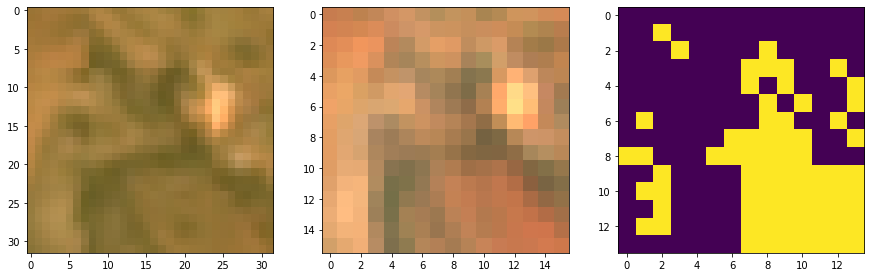

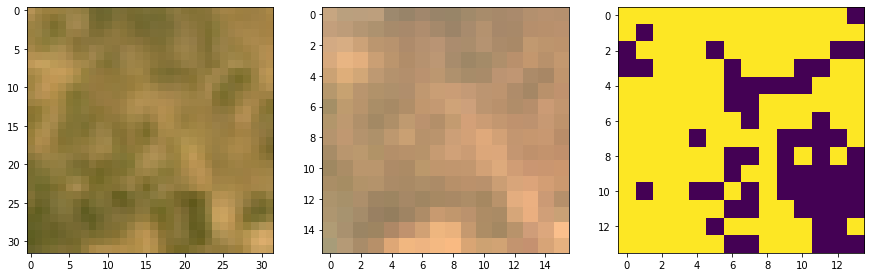

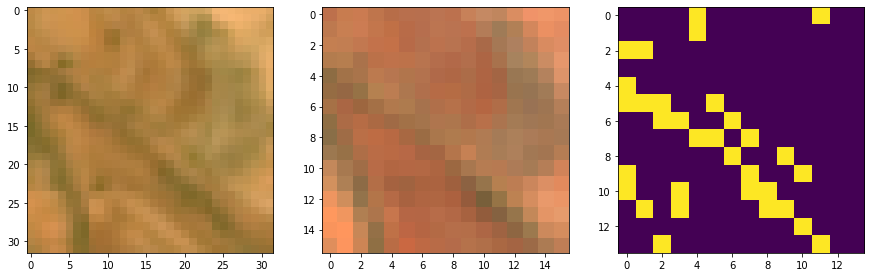

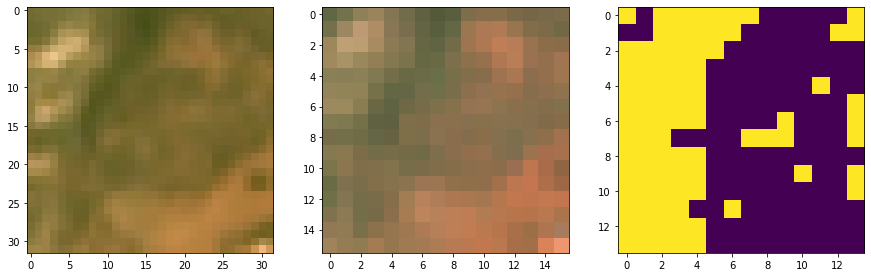

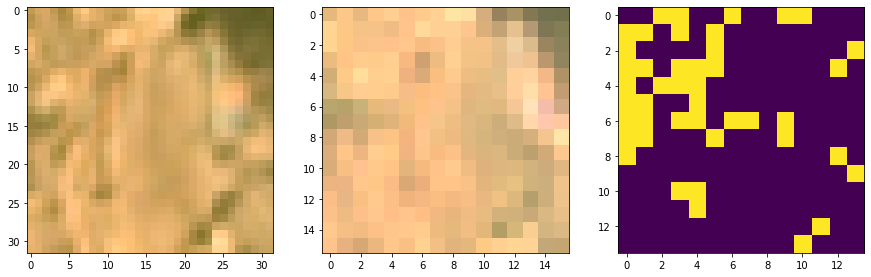

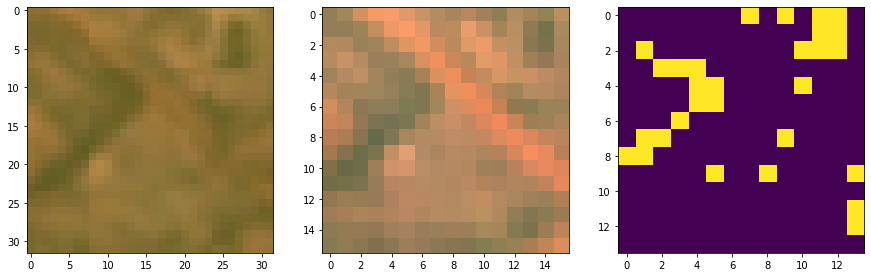

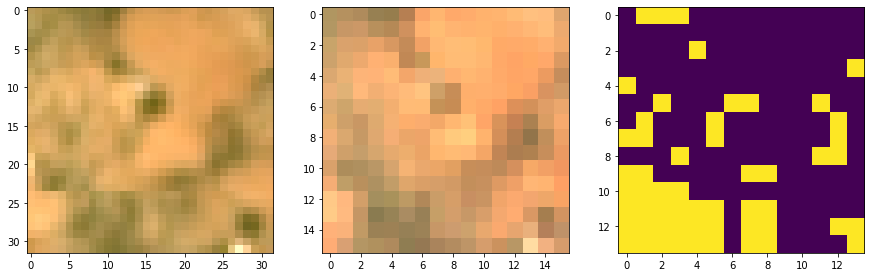

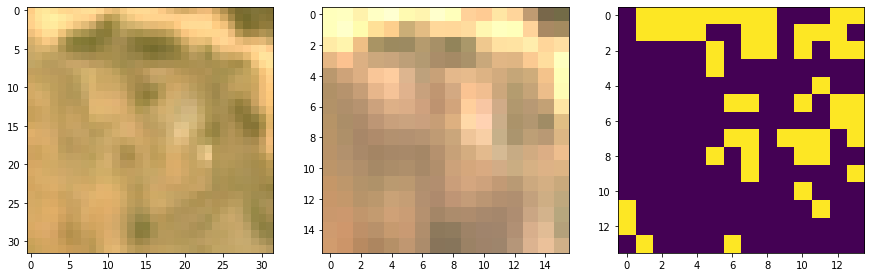

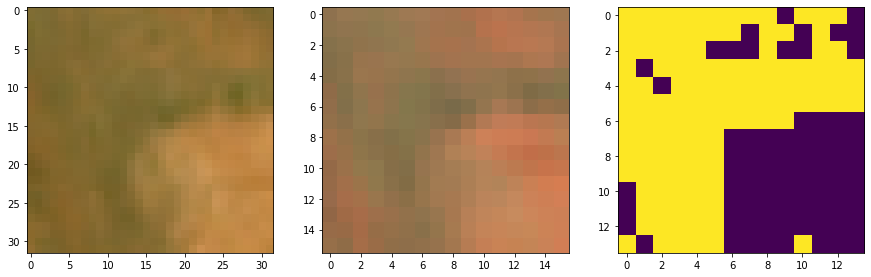

In [17]:
for i, val in enumerate(plot_ids):
    bbx = calc_bbox(val, df = df)
    bbx = bounding_box(bbx, expansion = 160)
    within = within_tif(bbx)
    if within:
        print(i, val)
        ds = gdal.Translate('', '../../data/makueni3.tif', format = 'MEM',
                    projWin = [bbx[0][0], bbx[1][1], 
                               bbx[1][0], bbx[0][1]])
        planet = np.array(ds.ReadAsArray())
        planet = np.swapaxes(planet, 0, 2)
        planet = np.swapaxes(planet, 0, 1)
        planet = planet[..., :-1]
        planet = np.float32(planet)
        planet = resize(planet, (32, 32, planet.shape[-1]), order = 0)
        np.save(f"../../data/test-planet/{str(val)}.npy", planet)
        
        bgr = planet[..., :3]
        print(np.max(planet))
        bgr = bgr / 1600
        red = np.copy(bgr[..., 2])
        blue = np.copy(bgr[..., 0])
        bgr[..., 0] = red
        bgr[..., 2] = blue
        
        
        x = np.load(f"../../data/test-s2/{plot_ids[i]}.npy")
        x = x[..., :3]
        blue = np.copy(x[..., 0])
        red = np.copy(x[..., 2])
        x[..., 0] = red
        x[..., 2] = blue

        y = reconstruct_images(plot_ids[i])
        y = np.array(y)*255
        images = [bgr, x[12] * 6, y]
        plt.figure(figsize=(15,10))
        columns = 3
        for i, image in enumerate(images):
            plt.subplot(len(images) / columns + 1, columns, i + 1)
            plt.imshow(image)
            

# Generate train data

In [9]:
data_y = np.empty((len(plot_ids), 14, 14))
data_x = np.empty((len(plot_ids), 24, 16, 16, 17))
data_planet = np.empty((len(plot_ids), 32, 32, 4))
for i, val in enumerate(plot_ids):
    y = reconstruct_images(val)
    x = np.load(f"../../data/train-s2/{str(val)}.npy")
    x_s1 = np.load(f"../../data/train-s1/{str(val)}.npy")
    x = np.concatenate([x, x_s1], axis = -1)
    planet = np.load(f"../../data/train-planet/{str(val)}.npy")
    data_y[i] = y
    data_x[i] = x
    data_planet[i] = planet

In [12]:
np.save("data/train_y.npy", data_y)
np.save("data/train_x.npy", data_x)
np.save("data/train_planet.npy", data_planet)
        